### import

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ROOT
import ctypes
import math
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np

from main.data_tools.extract_Nevents import get_Nevents

Welcome to JupyROOT 6.26/04


In [2]:
ROOT.gROOT.LoadMacro('/home/jykim/workspace/DRAW_and_FITTING/main/Belle2Style.C')
ROOT.SetBelle2Style()


Applying BELLE2 style settings...


In [3]:
# ROOT.RooClassFactory.makePdf("MyPdf_xsquared_nopara", "x", "", "x*x")
ROOT.gROOT.ProcessLineSync(".x MyPdf_xsquared_nopara.cxx+")

94202702503536

(MyPdf_xsquared_nopara) An instance of MyPdf_xsquared_nopara.


In [4]:
# ROOT.RooClassFactory.makePdf("MyPdf_one_minus_squared", "y", "", "1-y*y")
ROOT.gROOT.ProcessLineSync(".x MyPdf_one_minus_squared.cxx+")

94202564991296

(MyPdf_one_minus_squared) An instance of MyPdf_one_minus_squared.


# Extract 2D data(ROOT)

In [5]:
base_file_loc =  '/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_sigbkg/'
# base_file_loc =  '/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_bkg/'

loc_ccbar = base_file_loc + 'ccbar/recon_udst_*.root'
# loc_ccbar = base_file_loc + 'topo/resultfile/result_antiKstar/standard.root'
loc_uubar = base_file_loc + 'uubar/recon_udst_*.root'
loc_ddbar = base_file_loc + 'ddbar/recon_udst_*.root'
loc_ssbar = base_file_loc + 'ssbar/recon_udst_*.root'
loc_charged = base_file_loc + 'charged/recon_udst_*.root'
loc_mixed = base_file_loc + 'mixed/recon_udst_*.root'
loc_taupair = base_file_loc + 'taupair/recon_udst_*.root'

file_list = [loc_ccbar,loc_uubar,loc_uubar,loc_ssbar,loc_charged,loc_mixed,loc_taupair]


loc_ccbar_CC = base_file_loc + 'ccbar/recon_udst_*.root/phi_cc'
# loc_ccbar = base_file_loc + 'topo/resultfile/result_antiKstar/standard.root'
loc_uubar_CC = base_file_loc + 'uubar/recon_udst_*.root/phi_cc'
loc_ddbar_CC = base_file_loc + 'ddbar/recon_udst_*.root/phi_cc'
loc_ssbar_CC = base_file_loc + 'ssbar/recon_udst_*.root/phi_cc'
loc_charged_CC = base_file_loc + 'charged/recon_udst_*.root/phi_cc'
loc_mixed_CC = base_file_loc + 'mixed/recon_udst_*.root/phi_cc'
loc_taupair_CC = base_file_loc + 'taupair/recon_udst_*.root/phi_cc'


file_list += [loc_ccbar_CC,loc_uubar_CC,loc_uubar_CC,loc_ssbar_CC,loc_charged_CC,loc_mixed_CC,loc_taupair_CC]


In [6]:
f = ROOT.TFile.Open("/home/jykim/workspace/DRAW_and_FITTING/main/FITTING/phigamma/1D_1ab_sigbkg/phig_MC15ri_half1M_signalMC_fitresult.root")
result_object = ROOT.gDirectory.Get("phig")
f.Close()

fit_args = result_object.floatParsFinal()

x_sig_alpha= ROOT.RooRealVar("x_sig_alpha", "",  fit_args.at(0).getVal()) 
x_sig_mean = ROOT.RooRealVar("x_sig_mean", "",  fit_args.at(1).getVal()) 
# x_sig_mean = ROOT.RooRealVar("x_sig_mean", "mean of gaussians", 1.863,1.86, 1.88)

x_sig_n_CB = ROOT.RooRealVar("x_sig_n_CB", "",  fit_args.at(2).getVal()) 
x_sig_sig1frac = ROOT.RooRealVar("x_sig_sig1frac", "",  fit_args.at(3).getVal()) 
x_sig_sigma1 = ROOT.RooRealVar("x_sig_sigma1", "",  fit_args.at(4).getVal()) 
x_sig_sigma2 = ROOT.RooRealVar("x_sig_sigma2", "",  fit_args.at(5).getVal()) 

In [7]:
f = ROOT.TFile.Open("/home/jykim/workspace/DRAW_and_FITTING/main/FITTING/phigamma/1D_1ab_sigbkg/phig_MC15ri_1ab_Vpi0_fitresult.root")
result_object2 = ROOT.gDirectory.Get("phig")
f.Close()
fit_args2 = result_object2.floatParsFinal()

x_bkg1_alpha = ROOT.RooRealVar("x_bkg1_alpha", "",  fit_args2.at(0).getVal()) 
x_bkg1_mean = ROOT.RooRealVar("x_bkg1_mean", "",  fit_args2.at(1).getVal()) 
x_bkg1_n_CB = ROOT.RooRealVar("x_bkg1_n_CB", "",  fit_args2.at(2).getVal()) 
x_bkg1_sigma2 = ROOT.RooRealVar("x_bkg1_sigma2", "",  fit_args2.at(3).getVal()) 


In [8]:
f = ROOT.TFile.Open("/home/jykim/workspace/DRAW_and_FITTING/main/FITTING/phigamma/1D_1ab_sigbkg/phig_MC15ri_1ab_others_fitresult.root")
result_object3 = ROOT.gDirectory.Get("phig")
f.Close()

fit_args3 = result_object3.floatParsFinal()

x_bkg2frac1 = ROOT.RooRealVar("x_bkg2frac1", "fraction of component 1 in signal", fit_args3.at(0).getVal())

x_bkg2_tau = ROOT.RooRealVar("x_bkg2_tau", "",  fit_args3.at(1).getVal()) 
x_bkg2_c0 = ROOT.RooRealVar("x_bkg2_c0", "c0",fit_args3.at(2).getVal()) 
x_bkg2_c1 = ROOT.RooRealVar("x_bkg2_c1", "c0",fit_args3.at(3).getVal()) 



In [9]:
def Linearity_test_fix_signal_shape(N_Input=100):

    mychain = ROOT.TChain("phi")
    # mychain = ROOT.TChain("phi_cc")

    for i in file_list:
        mychain.Add(i)

    yrange = (-1, 1)
    x = ROOT.RooRealVar("D0_M", "M(D^{0}) [GeV/c^{2}]", 1.68, 2.05, "")
    y = ROOT.RooRealVar("D0_cosHel_0", "cos#theta_{H}", yrange[0], yrange[1], "")
    # z = ROOT.RooRealVar("Belle2Pi0Veto_75MeV", "M(D^{0}) [GeV/c^{2}]",0,10, "")
    z = ROOT.RooRealVar("dM_pi0_75MeV", "M(D^{0}) [GeV/c^{2}]",0,10, "")


    # data = ROOT.RooDataSet("data","", ROOT.RooArgSet(x,y,z), ROOT.RooFit.Import(mychain), Cut=" D0_M>1.68 & D0_M<2.05 & Belle2Pi0Veto_75MeV > 0.022 ")
    before_data = ROOT.RooDataSet("data","", ROOT.RooArgSet(x,y,z), ROOT.RooFit.Import(mychain), Cut=" D0_M>1.68 & D0_M<2.05 & dM_pi0_75MeV > 0.023 ")


    w_1 = ROOT.RooRealVar('w_1', 'w', 0,1)
    w_1.setVal(1)
    before_data.addColumn(w_1)
    data = ROOT.RooDataSet(before_data.GetName(), before_data.GetTitle(),before_data, before_data.get(), '' ,  'w_1')
    
    mychain2 = ROOT.TChain("phi")
    mychain2.Add("/media/jykim/T7/storage/01_recon/phi/D0_massveto_v2_half_1_optimzed_sigext_signalMC_recon_mdst_phi.root")
    signal_no_weight = ROOT.RooDataSet("signal_no_weight","", ROOT.RooArgSet(x,y,z), ROOT.RooFit.Import(mychain2), Cut=" D0_M>1.76 & D0_M<1.92 & dM_pi0_75MeV > 0.023 ")
    # signal_no_weight = ROOT.RooDataSet("signal_no_weight","", ROOT.RooArgSet(x,y,z), ROOT.RooFit.Import(mychain2), Cut=" D0_M>1.68 & D0_M<2.05 & dM_pi0_75MeV > 0.023 ")


    w = ROOT.RooRealVar('w', 'w', 0,1)


    N_sig_before = signal_no_weight.sumEntries()
    print(N_sig_before)

    # N_Input = 100
    w.setVal(N_Input/N_sig_before)
    print(w)

    signal_no_weight.addColumn(w)
    
    signal_yes_weight = ROOT.RooDataSet(signal_no_weight.GetName(), signal_no_weight.GetTitle(),signal_no_weight, signal_no_weight.get(), '' ,  'w')
    
    data.append(signal_yes_weight)
    N_total = data.sumEntries()
    print(N_total)
    
    file1_name="Plot_linearity_test/Linearity_x" + str(N_Input)  + ".png" 
    file2_name="Plot_linearity_test/Linearity_y" + str(N_Input)  + ".png" 

    ####################
    #D0_M
    # x.setBins(50)
    x_sig_sig1 = ROOT.RooGaussian("x_sig_sig1", "Signal component 1", x, x_sig_mean, x_sig_sigma1)
    x_sig_sig2 =  ROOT.RooCBShape("x_sig_sig2", "Signal component 2", x, x_sig_mean, x_sig_sigma2, x_sig_alpha, x_sig_n_CB)

    x_sig_model = ROOT.RooAddPdf("x_sig_model", "model", [x_sig_sig1, x_sig_sig2], x_sig_sig1frac)

    #### Construct bkg model for x
    #phi pi0

    # x_bkg1_1 = ROOT.RooGaussian("x_bkg1_1", "Signal component 1", x, x_bkg1_mean, x_bkg1_sigma1)
    # x_bkg1_2 = ROOT.RooCBShape("x_bkg1_2", "Signal component 2", x, x_bkg1_mean, x_bkg1_sigma2, x_bkg1_alpha, x_bkg1_n_CB)
    # x_bkg1_model = ROOT.RooAddPdf("x_bkg1_model", "Signal1", [x_bkg1_1, x_bkg1_2], x_bkg1frac1)

    x_bkg1_model = ROOT.RooCBShape("x_bkg1_model", "Signal component 2", x, x_bkg1_mean, x_bkg1_sigma2, x_bkg1_alpha, x_bkg1_n_CB)


    ####BKG2
    # remaining
    x_bkg2_2 = ROOT.RooPolynomial("x_bkg2_2", "Signal component 1", x,ROOT.RooArgList(x_bkg2_c0, x_bkg2_c1))
    x_bkg2_3 = ROOT.RooExponential("x_bkg2_3", "Signal component 1", x, x_bkg2_tau)
    x_bkg2frac1 = ROOT.RooRealVar("x_bkg2frac1", "fraction of component 1 in signal", 0.5, 0.0, 1.0)
    x_bkg2_model = ROOT.RooAddPdf("x_bkg2_model", "model", [x_bkg2_2, x_bkg2_3], x_bkg2frac1)

    ################
    #D0_cosHel_0
    # y.setBins(50)

    y_sig_model = ROOT.MyPdf_one_minus_squared("y_sig_model", "y_sig", y)

    #### Construct bkg model for y
    #phi pi0
    y_bkg1_model = ROOT.MyPdf_xsquared_nopara("y_bkg1_model", "y_bkg1", y)

    #remaining
    # y_bkg2_c0 = ROOT.RooRealVar("y_bkg2_c0", "c0",0.5, -1,1)
    # y_bkg2_c1 = ROOT.RooRealVar("y_bkg2_c1", "c1",0.2, -1,1)

    y_bkg2_c0 = ROOT.RooRealVar("y_bkg2_c0", "c0",-1.1456e-01)
    y_bkg2_c1 = ROOT.RooRealVar("y_bkg2_c1", "c1",3.5924e-01)

    y_bkg2_model= ROOT.RooPolynomial("y_bkg2_model", "Signal component 1", y, ROOT.RooArgList(y_bkg2_c0, y_bkg2_c1))

    ################
    bkg1_xy_model = ROOT.RooProdPdf("bkg1_xy_model","bkg1_xy_model",ROOT.RooArgSet(x_bkg1_model,y_bkg1_model))
    bkg2_xy_model = ROOT.RooProdPdf("bkg2_xy_model","bkg2_xy_model",ROOT.RooArgSet(x_bkg2_model,y_bkg2_model))


    sig_model = ROOT.RooProdPdf("sig_model","sig_xy_model",ROOT.RooArgSet(x_sig_model, y_sig_model))


    ####################################
    # construct signal + bkg pdf
    nsig = ROOT.RooRealVar("nsig","# signal events",N_total*0.01,0,N_total*0.5)
    nbkg1 = ROOT.RooRealVar("nbkg1","# bkg events",N_total*0.8,0, N_total)
    nbkg2 = ROOT.RooRealVar("nbkg2","# bkg events",N_total*0.1,0, N_total*0.5)

    extended_model = ROOT.RooAddPdf("extended_model", "x_model", ROOT.RooArgSet(sig_model,bkg1_xy_model,bkg2_xy_model), ROOT.RooArgSet(nsig, nbkg1, nbkg2))


    canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

    xlow = ctypes.c_double()
    ylow = ctypes.c_double()
    xup = ctypes.c_double()
    yup = ctypes.c_double()

    canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
    canv.Divide(1,2)

    xlow = xlow.value
    ylow = ylow.value
    xup = xup.value
    yup = yup.value

    upPad = canv.GetPad(1)
    upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

    dwPad = canv.GetPad(2)
    dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))
    
    r = extended_model.fitTo(data,NumCPU=12, Extended=ROOT.kTRUE,PrintLevel=-1, Save=1)


    # r.Print()
    canv.cd(1) 
    #     frame = x.frame(Title="D^{0} #rightarrow #bar{K}^{*0} #pi^{0}")
    frame = x.frame(Title=" ")

    data.plotOn(frame,Name = "data1", XErrorSize=0)

    extended_model.plotOn(frame, Name="fitx_sig", Components=x_sig_model, LineStyle=ROOT.kDashed, LineColor='r')
    extended_model.plotOn(frame, Name="fitx_bkg1", Components=x_bkg1_model, LineStyle=ROOT.kDashed, LineColor=593)
    extended_model.plotOn(frame, Name="fitx_bkg2", Components=x_bkg2_model, LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen+2)
    extended_model.plotOn(frame,Name="fitting")
    frame.Draw("PE")
        # sig.paramOn(frame)
    frame.GetXaxis().CenterTitle(True)

    leg1 = ROOT.TLegend(0.62, 0.65, 0.92, 0.9)
    leg1.SetFillColor(0)

        # leg1.SetHeader("The Legend title","C")
    leg1.AddEntry("data1", "MC", "PE")
    leg1.AddEntry("fitting", "Fit", "l")
    leg1.AddEntry("fitx_sig", "Signal", "l")
    leg1.AddEntry("fitx_bkg1", "D^{0}#rightarrow(#phi#rightarrowK^{-}K^{+})#pi^{0}", "l")
    leg1.AddEntry("fitx_bkg2", "Combinatorial bkg", "l")
    # leg1.AddEntry("fitx_bkg3", "bkg3", "l")

    # leg1.SetTextSize(0.05)
    # leg1.SetTextAlign(13)

    leg1.SetBorderSize(0)
    leg1.Draw()

    hpull = frame.pullHist()
    hpull.SetFillStyle(1001)
    hpull.SetFillColor(1);
    for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
        hpull.SetPointError(i,0.0,0.0,0.0,0.0)
        # pullplot = x.frame(Title(" "))
    pullplot = x.frame()
    pullplot.SetTitle("")
    pullplot.addPlotable(hpull,"BE")
        # pullplot.addPlotable(hpull,"PE")

    pullplot.SetYTitle("Pull")
    pullplot.GetXaxis().SetTitleSize(0)
    pullplot.GetYaxis().SetTitleSize(0.22)
    pullplot.GetYaxis().CenterTitle(True)
    pullplot.GetYaxis().SetTitleOffset(0.2)
    pullplot.SetMinimum(-4.)
    pullplot.SetMaximum(4.)
    pullplot.GetXaxis().SetLabelSize(0.15)
    pullplot.GetYaxis().SetLabelSize(0.105)
    canv.cd(2)
    pullplot.Draw()

    xmin1 = ctypes.c_double(1.68)
    xmax1 = ctypes.c_double(2.05)
        # xmin1 = 0.1
        # xmax1 = 0.18
    line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
    line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
    line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

    line.SetLineColor(ROOT.kGray+1)
    line.SetLineWidth(3)
    line1.SetLineColor(ROOT.kBlack)
    line2.SetLineColor(ROOT.kGray+1)
    line1.SetLineStyle(2)
    line2.SetLineStyle(2)
    line.Draw("SAME")
    line1.Draw("SAME")
    line2.Draw("SAME")

    canv.Update()

    canv.Draw()
    canv.SaveAs(file1_name)

    #######################################
    canv2 = ROOT.TCanvas("Canvas", "Canvas", 700, 640)
    # canv2.cd()
    y_xlow = ctypes.c_double()
    y_ylow = ctypes.c_double()
    y_xup = ctypes.c_double()
    y_yup = ctypes.c_double()

    canv2.GetPad(0).GetPadPar(y_xlow, y_ylow, y_xup, y_yup)
    canv2.Divide(1,2)

    y_xlow = y_xlow.value
    y_ylow = y_ylow.value
    y_xup = y_xup.value
    y_yup = y_yup.value

    y_upPad = canv2.GetPad(1)
    y_upPad.SetPad(y_xlow, y_ylow+0.25*(y_yup-y_ylow),y_xup,y_yup)

    y_dwPad = canv2.GetPad(2)
    y_dwPad.SetPad(y_xlow, y_ylow,y_xup,y_ylow+0.25*(y_yup-y_ylow))


    yframe = y.frame(Title=" ")
    canv2.cd(1) 
    data.plotOn(yframe,Name = "data2", XErrorSize=0, DataError=ROOT.RooAbsData.SumW2)

        # sig1.plotOn(frame, LineStyle="--", LineColor="r")
        # sig2.plotOn(frame, LineStyle="--", LineColor="r")
    # sig.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
    # sig.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
    # sig.plotOn(frame, Name="CB2", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)

    # sig_xy_model.plotOn(frame,Components=mass_sig, ProjWData=data, Name="fitting")

    extended_model.plotOn(yframe, Name="fity_sig", Components=y_sig_model, LineStyle=ROOT.kDashed, LineColor='r')
    extended_model.plotOn(yframe, Name="fity_bkg1", Components=ROOT.RooArgSet(y_bkg1_model), LineStyle=ROOT.kDashed, LineColor=593)
    extended_model.plotOn(yframe, Name="fity_bkg2", Components=ROOT.RooArgSet(y_bkg2_model), LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen+2)
    # extended_model.plotOn(yframe, Name="fity_bkg3", Components=ROOT.RooArgSet(y_bkg3_model), LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen+10)

    # extended_model.plotOn(yframe, Name="fity_bkg", Components=ROOT.RooArgSet(y_bkg1_model,y_bkg2_model), LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen+2)
    # extended_model.plotOn(yframe, Name="fity_bkg", Components=ROOT.RooArgSet(y_bkg1_model,y_bkg2_model,y_bkg3_model), LineStyle=ROOT.kDashed, LineColor=593)

    #sig_xy_model.plotOn(yframe, Name="fit3", Components=sigy3, LineStyle=ROOT.kDashed, LineColor=593)



    extended_model.plotOn(yframe,Name="fitting2")



    yframe.Draw("PE")

        # sig.paramOn(frame)
    yframe.GetXaxis().CenterTitle(True)




    y_leg1 = ROOT.TLegend(0.52, 0.65, 0.82, 0.9)
    # y_leg1.SetFillColor(ROOT.kWhite)
    y_leg1.SetFillColor(0)

        # leg1.SetHeader("The Legend title","C")
    y_leg1.AddEntry("data2", "MC", "PE")
    y_leg1.AddEntry("fitting2", "Fit", "l")
    y_leg1.AddEntry("fity_sig", "Signal", "l")
    y_leg1.AddEntry("fity_bkg1", "D^{0}#rightarrow(#phi#rightarrowK^{-}K^{+})#pi^{0}", "l")
    y_leg1.AddEntry("fity_bkg2", "Combinatorial bkg", "l")
    # y_leg1.AddEntry("fity_bkg3", "bkg3", "l")



    y_leg1.SetBorderSize(0)

    y_leg1.Draw()

    y_hpull = yframe.pullHist()
    y_hpull.SetFillStyle(1001)
    y_hpull.SetFillColor(1);
    for i in range(0,y_hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
        y_hpull.SetPointError(i,0.0,0.0,0.0,0.0)
        # pullplot = x.frame(Title(" "))
    y_pullplot = y.frame()
    y_pullplot.SetTitle("")
    y_pullplot.addPlotable(y_hpull,"BE")
        # pullplot.addPlotable(hpull,"PE")

    y_pullplot.SetYTitle("Pull")
    y_pullplot.GetXaxis().SetTitleSize(0)
    y_pullplot.GetYaxis().SetTitleSize(0.22)
    y_pullplot.GetYaxis().CenterTitle(True)
    y_pullplot.GetYaxis().SetTitleOffset(0.2)
    y_pullplot.SetMinimum(-4.)
    y_pullplot.SetMaximum(4.)
    y_pullplot.GetXaxis().SetLabelSize(0.15)
    y_pullplot.GetYaxis().SetLabelSize(0.105)
    canv2.cd(2)
    y_pullplot.Draw()

    y_xmin1 = ctypes.c_double(-1)
    y_xmax1 = ctypes.c_double(1)
    y_line = ROOT.TLine(y_xmin1,0.0,y_xmax1,0.0)
    y_line1 = ROOT.TLine(y_xmin1,3.0,y_xmax1,3.0)
    y_line2 = ROOT.TLine(y_xmin1,-3.0,y_xmax1,-3.0)

    y_line.SetLineColor(ROOT.kGray+1)
    y_line.SetLineWidth(3)
    y_line1.SetLineColor(ROOT.kBlack)
    y_line2.SetLineColor(ROOT.kGray+1)
    y_line1.SetLineStyle(2)
    y_line2.SetLineStyle(2)
    y_line.Draw("SAME")
    y_line1.Draw("SAME")
    y_line2.Draw("SAME")

    canv2.Update()

    canv2.Draw()
    canv2.SaveAs(file2_name)
    
    Nsig = nsig.getValV()
    Nsig_error = nsig.getError()
    
    return Nsig, Nsig_error

In [22]:
def Linearity_test(N_Input=100):

    mychain = ROOT.TChain("phi")
    # mychain = ROOT.TChain("phi_cc")

    for i in file_list:
        mychain.Add(i)

    yrange = (-1, 1)
    x = ROOT.RooRealVar("D0_M", "M(D^{0}) [GeV/c^{2}]", 1.68, 2.05, "")
    y = ROOT.RooRealVar("D0_cosHel_0", "cos#theta_{H}", yrange[0], yrange[1], "")
    # z = ROOT.RooRealVar("Belle2Pi0Veto_75MeV", "M(D^{0}) [GeV/c^{2}]",0,10, "")
    z = ROOT.RooRealVar("dM_pi0_75MeV", "M(D^{0}) [GeV/c^{2}]",0,10, "")


    # data = ROOT.RooDataSet("data","", ROOT.RooArgSet(x,y,z), ROOT.RooFit.Import(mychain), Cut=" D0_M>1.68 & D0_M<2.05 & Belle2Pi0Veto_75MeV > 0.022 ")
    data = ROOT.RooDataSet("data","", ROOT.RooArgSet(x,y,z), ROOT.RooFit.Import(mychain), Cut=" D0_M>1.68 & D0_M<2.05 & dM_pi0_75MeV > 0.023 ")


    # w_1 = ROOT.RooRealVar('w_1', 'w', 0,1)
    # w_1.setVal(1)
    # before_data.addColumn(w_1)
    # data = ROOT.RooDataSet(before_data.GetName(), before_data.GetTitle(),before_data, before_data.get(), '' ,  'w_1')
    
    # mychain2 = ROOT.TChain("phi")
    # mychain2.Add("/media/jykim/T7/storage/01_recon/phi/D0_massveto_v2_half_1_optimzed_sigext_signalMC_recon_mdst_phi.root")
    # signal_no_weight = ROOT.RooDataSet("signal_no_weight","", ROOT.RooArgSet(x,y,z), ROOT.RooFit.Import(mychain2), Cut=" D0_M>1.76 & D0_M<1.92 & dM_pi0_75MeV > 0.023 ")
    # signal_no_weight = ROOT.RooDataSet("signal_no_weight","", ROOT.RooArgSet(x,y,z), ROOT.RooFit.Import(mychain2), Cut=" D0_M>1.68 & D0_M<2.05 & dM_pi0_75MeV > 0.023 ")


    # w = ROOT.RooRealVar('w', 'w', 0,1)


    # N_sig_before = signal_no_weight.sumEntries()
    # print(N_sig_before)

    # N_Input = 100
    # w.setVal(N_Input/N_sig_before)
    # print(w)

    # signal_no_weight.addColumn(w)
    
    # signal_yes_weight = ROOT.RooDataSet(signal_no_weight.GetName(), signal_no_weight.GetTitle(),signal_no_weight, signal_no_weight.get(), '' ,  'w')
    
    # data.append(signal_yes_weight)
    N_total = data.sumEntries()
    print(N_total)
    
    # file1_name="Plot_linearity_test/Linearity_x" + str(N_Input)  + ".png" 
    # file2_name="Plot_linearity_test/Linearity_y" + str(N_Input)  + ".png" 

    ####################
    #D0_M
    # x.setBins(50)
    x_sig_sig1 = ROOT.RooGaussian("x_sig_sig1", "Signal component 1", x, x_sig_mean, x_sig_sigma1)
    x_sig_sig2 =  ROOT.RooCBShape("x_sig_sig2", "Signal component 2", x, x_sig_mean, x_sig_sigma2, x_sig_alpha, x_sig_n_CB)

    x_sig_model = ROOT.RooAddPdf("x_sig_model", "model", [x_sig_sig1, x_sig_sig2], x_sig_sig1frac)

    #### Construct bkg model for x
    #phi pi0

    # x_bkg1_1 = ROOT.RooGaussian("x_bkg1_1", "Signal component 1", x, x_bkg1_mean, x_bkg1_sigma1)
    # x_bkg1_2 = ROOT.RooCBShape("x_bkg1_2", "Signal component 2", x, x_bkg1_mean, x_bkg1_sigma2, x_bkg1_alpha, x_bkg1_n_CB)
    # x_bkg1_model = ROOT.RooAddPdf("x_bkg1_model", "Signal1", [x_bkg1_1, x_bkg1_2], x_bkg1frac1)

    x_bkg1_model = ROOT.RooCBShape("x_bkg1_model", "Signal component 2", x, x_bkg1_mean, x_bkg1_sigma2, x_bkg1_alpha, x_bkg1_n_CB)


    ####BKG2
    # remaining
    x_bkg2_2 = ROOT.RooPolynomial("x_bkg2_2", "Signal component 1", x,ROOT.RooArgList(x_bkg2_c0, x_bkg2_c1))
    x_bkg2_3 = ROOT.RooExponential("x_bkg2_3", "Signal component 1", x, x_bkg2_tau)
    x_bkg2frac1 = ROOT.RooRealVar("x_bkg2frac1", "fraction of component 1 in signal", 0.5, 0.0, 1.0)
    x_bkg2_model = ROOT.RooAddPdf("x_bkg2_model", "model", [x_bkg2_2, x_bkg2_3], x_bkg2frac1)

    ################
    #D0_cosHel_0
    # y.setBins(50)

    y_sig_model = ROOT.MyPdf_one_minus_squared("y_sig_model", "y_sig", y)

    #### Construct bkg model for y
    #phi pi0
    y_bkg1_model = ROOT.MyPdf_xsquared_nopara("y_bkg1_model", "y_bkg1", y)

    #remaining
    # y_bkg2_c0 = ROOT.RooRealVar("y_bkg2_c0", "c0",0.5, -1,1)
    # y_bkg2_c1 = ROOT.RooRealVar("y_bkg2_c1", "c1",0.2, -1,1)

    y_bkg2_c0 = ROOT.RooRealVar("y_bkg2_c0", "c0",-1.1456e-01)
    y_bkg2_c1 = ROOT.RooRealVar("y_bkg2_c1", "c1",3.5924e-01)

    y_bkg2_model= ROOT.RooPolynomial("y_bkg2_model", "Signal component 1", y, ROOT.RooArgList(y_bkg2_c0, y_bkg2_c1))

    ################
    bkg1_xy_model = ROOT.RooProdPdf("bkg1_xy_model","bkg1_xy_model",ROOT.RooArgSet(x_bkg1_model,y_bkg1_model))
    # bkg2_xy_model = ROOT.RooProdPdf("bkg2_xy_model","bkg2_xy_model",ROOT.RooArgSet(x_bkg2_model,y_bkg2_model))


    sig_model = ROOT.RooProdPdf("sig_model","sig_xy_model",ROOT.RooArgSet(x_sig_model, y_sig_model))


    ####################################
    # construct signal + bkg pdf
    nsig = ROOT.RooRealVar("nsig","# signal events",N_total*0.01,0,N_total*0.5)
    nbkg1 = ROOT.RooRealVar("nbkg1","# bkg events",N_total*0.8,0, N_total)
    nbkg2 = ROOT.RooRealVar("nbkg2","# bkg events",N_total*0.1,0, N_total*0.5)

    extended_model = ROOT.RooAddPdf("extended_model", "x_model", ROOT.RooArgSet(sig_model,bkg1_xy_model,bkg2_xy_model), ROOT.RooArgSet(nsig, nbkg1, nbkg2))


    canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

    xlow = ctypes.c_double()
    ylow = ctypes.c_double()
    xup = ctypes.c_double()
    yup = ctypes.c_double()

    canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
    canv.Divide(1,2)

    xlow = xlow.value
    ylow = ylow.value
    xup = xup.value
    yup = yup.value

    upPad = canv.GetPad(1)
    upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

    dwPad = canv.GetPad(2)
    dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))
    
    r = extended_model.fitTo(data,NumCPU=12, Extended=ROOT.kTRUE,PrintLevel=-1, Save=1)

    nsig.setVal(N_Input)

    mcstudy = ROOT.RooMCStudy(
        extended_model,
        {x,y},
        # Binned=True,
        Silence=True,
        Extended=True,
        FitOptions=dict(Save=True, PrintEvalErrors=0, NumCPU=12),
    )

    # Generate and fit events
    # ---------------------------------------------

    # Generate and fit 1000 samples of Poisson(nExpected) events
    mcstudy.generateAndFit(500)

    # Explore results of study
    # ------------------------------------------------
    # ------------------------------------------------

    # Make plots of the distributions of mean, error on mean and the pull of
    # mean
    frame1 = mcstudy.plotParam(nsig, Bins=50)
    frame2 = mcstudy.plotError(nsig, Bins=50)
    frame3 = mcstudy.plotPull(nsig, Bins=50, FitGauss=False)
    pullMean = ROOT.RooRealVar("pullMean","",0,-10,10)
    pullSigma = ROOT.RooRealVar("pullSigma","",1,0.1,5)
    #pullMean.setPlotLabel("pull #mu")   # // optional (to get nicer plot labels if you want)
    #pullSigma.setPlotLabel("pull #sigma")
    pullMean.setPlotLabel("#mu")   # // optional (to get nicer plot labels if you want)
    pullSigma.setPlotLabel("#sigma")

    pullGauss = ROOT.RooGaussian("pullGauss", "", frame3.getPlotVar() , pullMean, pullSigma)
    r_pull = pullGauss.fitTo(mcstudy.fitParDataSet(),NumCPU=12,PrintLevel=-1)
    # Plot distribution of minimized likelihood
    frame4 = mcstudy.plotNLL(Bins=50)

    # Make some histograms from the parameter dataset
    # hh_cor_a0_s1f = mcstudy.fitParDataSet().createHistogram("hh", x_sig_sigma2, YVar=x_sig_mean)
    # hh_cor_a0_a1 = mcstudy.fitParDataSet().createHistogram("hh", x_sig_mean, YVar=x_sig_sigma2)

    # Access some of the saved fit results from individual toys
    # corrHist000 = mcstudy.fitResult(0).correlationHist("c000")
    # corrHist127 = mcstudy.fitResult(1).correlationHist("c001")
    # corrHist953 = mcstudy.fitResult(2).correlationHist("c002")

    # Draw all plots on a canvas
    # ROOT.gStyle.SetPalette(1)
    # ROOT.gStyle.SetOptStat(0)
    c = ROOT.TCanvas("Canvas", "ToyMCstudy", 1500, 500)
    c.Divide(3, 1)
    c.cd(1)
    # ROOT.gPad.SetLeftMargin(0.15)
    # frame3.GetYaxis().SetTitleOffset(1.4)
    pullGauss.plotOn(frame3)
    #pullGauss.paramOn(frame3,xmin=0.55, xmax=0.75, ymax=0.9, sigDigits=3)
    pullGauss.paramOn(frame3, ROOT.RooFit.Layout(0.60, 0.80, 0.9), ROOT.RooFit.Format("NE",ROOT.RooFit.AutoPrecision(1)))

    frame3.Draw("PE")
    #
    c.cd(2)
    nsig_Mean = ROOT.RooRealVar("nsig_Mean","", N_Input,0.5*N_Input,1.5*N_Input)
    nsig_Sigma = ROOT.RooRealVar("nsig_Sigma","",N_Input*0.5,N_Input*0.001,N_Input*0.8)
    nsig_Mean.setPlotLabel("#mu")   # // optional (to get nicer plot labels if you want)
    nsig_Sigma.setPlotLabel("#sigma")

    nsig_Gauss = ROOT.RooGaussian("nsig_Gauss", "", frame1.getPlotVar() , nsig_Mean, nsig_Sigma)
    
    r_nsig = nsig_Gauss.fitTo(mcstudy.fitParDataSet(),NumCPU=12,PrintLevel=-1)

    nsig_Gauss.plotOn(frame1)
    #pullGauss.paramOn(frame3,xmin=0.55, xmax=0.75, ymax=0.9, sigDigits=3)
    nsig_Gauss.paramOn(frame1, ROOT.RooFit.Layout(0.60, 0.80, 0.9), ROOT.RooFit.Format("NE",ROOT.RooFit.AutoPrecision(1)))

    
    frame1.Draw("PE")
    c.cd(3)
    # ROOT.gPad.SetLeftMargin(0.15)
    # frame2.GetYaxis().SetTitleOffset(1.4)
    frame2.Draw("PE")
    # c.cd(4)
    # #ROOT.gPad.SetLeftMargin(0.15)
    # frame4.GetYaxis().SetTitleOffset(1.4)
    # frame4.Draw("PE")
    file_name="Plot_linearity_test/new_linearity_" + str(N_Input)  + ".png" 
    c.SaveAs(file_name)

    # Make ROOT.RooMCStudy object available on command line after
    # macro finishes
    # ROOT.gDirectory.Add(mcstudy)
    
    Nsig_mean = nsig_Mean.getValV()
    Nsig_mean_error = nsig_Mean.getError()
    
    return Nsig_mean, Nsig_mean_error

In [23]:
# Linearity_test(500)

In [41]:
N_start = 600
N_end = 760
N_step = 2
N_input = list()
for i in range(N_start,N_end, N_step):
    N_input.append(i)

In [ ]:
N_predict = list()
Fit_error = list()

#N_sig_fit = 681
#sqrt(681) ~ 26.0959
# 26.0959 * 3 = 78
N_start = 600
N_end = 760
N_step = 2
for i in range(N_start,N_end, N_step):
    N_input.append(i)
    
    N_fit, temp_fit_error = Linearity_test(i)
    N_predict.append(N_fit)
    Fit_error.append(temp_fit_error)
    
    print(f'Prediction: {N_fit}, Input: {i}, Error: {temp_fit_error}')

4996.0
Prediction: 598.7363074065752, Input: 600, Error: 1.6483689145302378
4996.0
Prediction: 602.3162968360795, Input: 602, Error: 1.5984100466646964
4996.0
Prediction: 605.7417384855162, Input: 604, Error: 1.7162241708493866
4996.0
Prediction: 608.340335724682, Input: 606, Error: 1.5838667685756036
4996.0
Prediction: 606.8605481484651, Input: 608, Error: 1.6373053617470532


iminuit version: 2.15.2


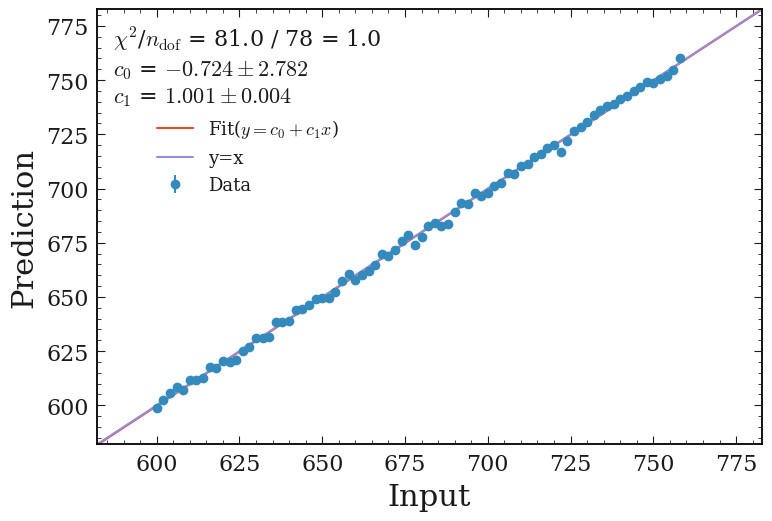

In [48]:

import matplotlib.pyplot as plt
# everything in iminuit is done through the Minuit object, so we import it
from iminuit import Minuit

# we also need a cost function to fit and import the LeastSquares function
from iminuit.cost import LeastSquares

# display iminuit version
import iminuit
print("iminuit version:", iminuit.__version__)

# our line model, unicode parameter names are supported :)
def line(x, c0, c1):
    return c0 + x * c1

least_squares = LeastSquares(N_input, N_predict, Fit_error, line)

m = Minuit(least_squares, c0=0, c1=0)  # starting values for α and β

m.migrad()  # finds minimum of least_squares function
m.hesse()  


# # plt.scatter(N_input, N_predict)



plt.errorbar(N_input, N_predict, yerr=Fit_error, fmt="o",label='Data')

# N_input = np.array(N_input)
np_N_input = np.linspace(N_start*0.97,N_end*1.03,101)

plt.plot(np_N_input, line(np_N_input, *m.values), label=r"Fit($y=c_0+c_1x$)")
# plt.plot([N_start*0.9,N_end*1.05], line([N_start*0.9,N_end*1.05], *m.values), label=r"Fit($y=c_0+c_1x$)")




# plt.xlim(N_start*0.9,N_end*1.05)
# plt.ylim(N_start*0.9,N_end*1.05)
plt.plot([N_start*0.97,N_end*1.03], [N_start*0.97,N_end*1.03], label='y=x')

# plt.plot([N_start,N_end], [N_start,N_end], label='y=x')


# plt.legend()
# plt.show()


# display legend with some fit info
fit_info = [
    f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {m.fval:.1f} / {m.ndof:.0f} = {m.fmin.reduced_chi2:.1f}",
]
for p, v, e in zip(m.parameters, m.values, m.errors):
    if p=='c0':
        p = r'$c_0$'
    elif p=='c1':
        p = r'$c_1$'
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")

plt.legend(title="\n".join(fit_info), frameon=False, fontsize=13)

plt.xlabel("Input")
plt.ylabel("Prediction")
plt.xlim(N_start*0.97,N_end*1.03)
plt.ylim(N_start*0.97,N_end*1.03)
# plt.xlim(N_start,N_end)
# plt.ylim(N_start,N_end)
plt.tight_layout()
plt.savefig("Linearity_test_fit.png")
plt.show();


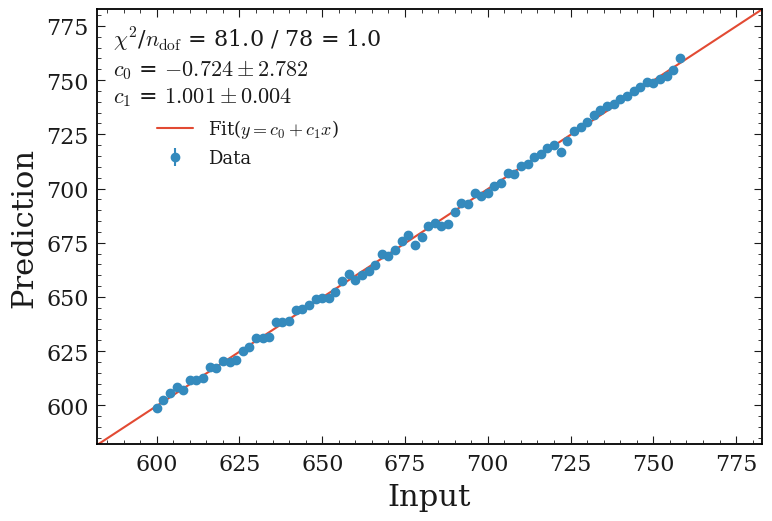

In [50]:

least_squares = LeastSquares(N_input, N_predict, Fit_error, line)

m = Minuit(least_squares, c0=0, c1=0)  # starting values for α and β

m.migrad()  # finds minimum of least_squares function
m.hesse()  


# # plt.scatter(N_input, N_predict)



plt.errorbar(N_input, N_predict, yerr=Fit_error, fmt="o",label='Data')

np_N_input = np.linspace(N_start*0.97,N_end*1.03,101)

plt.plot(np_N_input, line(np_N_input, *m.values), label=r"Fit($y=c_0+c_1x$)")



# plt.xlim(N_start*0.9,N_end*1.05)
# plt.ylim(N_start*0.9,N_end*1.05)
# plt.plot([N_start*0.9,N_end*1.05], [N_start*0.9,N_end*1.05], label='y=x')

# plt.legend()
# plt.show()


# display legend with some fit info
fit_info = [
    f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {m.fval:.1f} / {m.ndof:.0f} = {m.fmin.reduced_chi2:.1f}",
]
for p, v, e in zip(m.parameters, m.values, m.errors):
    if p=='c0':
        p = r'$c_0$'
    elif p=='c1':
        p = r'$c_1$'
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")

plt.legend(title="\n".join(fit_info), frameon=False, fontsize=13)

plt.xlabel("Input")
plt.ylabel("Prediction")
plt.xlim(N_start*0.97,N_end*1.03)
plt.ylim(N_start*0.97,N_end*1.03)
plt.tight_layout()
plt.savefig("Linearity_test_fit_no_ref.png")
plt.show();


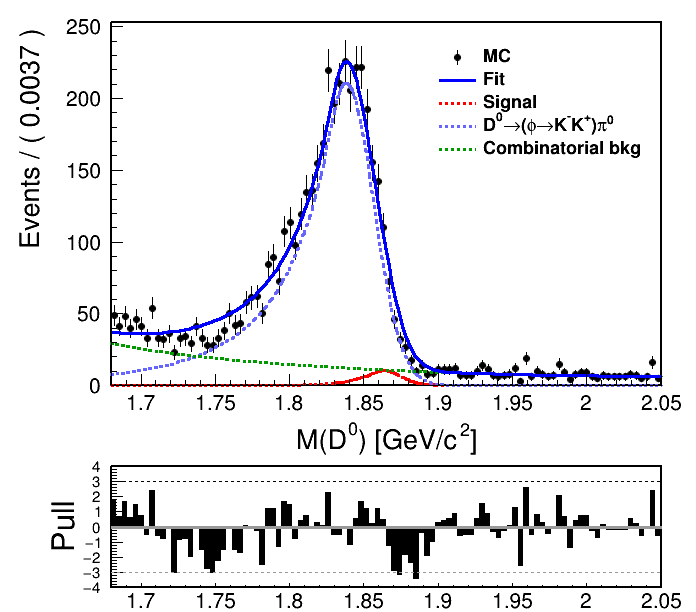

In [24]:
from IPython.display import Image
# Image("test2_x_D0.png")
Image("test2_x.png")


In [25]:
# extended_model.Print("t")
print(nsig)
print(nbkg1)
print(nbkg2)

RooRealVar::nsig = 99.8738 +/- 22.5054  L(0 - 2548) 

RooRealVar::nbkg1 = 3714.38 +/- 69.3923  L(0 - 5096) 

RooRealVar::nbkg2 = 1281.7 +/- 48.1974  L(0 - 2548) 



In [26]:
Fit_Nsig = nsig.getValV()
Fit_Nsig_error = nsig.getError()

In [95]:
# D0 bar
print(nsig)
print(nbkg1)
print(nbkg2)
# print(nbkg3)

Nsig_cc = get_Nevents(topo_file_D0bar, D0bar_tree, D0bar_cut, variables )
Fit_Nsig = nsig.getValV()
Fit_Nsig_error = nsig.getError()

Nbkg1_cc = get_Nevents(topo_file_D0bar, D0bar_tree, D0bar_bkg1cut, variables )
Fit_Nbkg1 = nbkg1.getValV()
Fit_Nbkg1_error = nbkg1.getError()

Nbkg2_cc = get_Nevents(topo_file_D0bar, D0bar_tree, D0bar_bkg2cut, variables )

Nbkg2_cc += get_Nevents(mixed_file_D0, D0bar_tree, base_cut, variables )
Nbkg2_cc += get_Nevents(uubar_file_D0, D0bar_tree, base_cut, variables )
Nbkg2_cc += get_Nevents(ddbar_file_D0, D0bar_tree, base_cut, variables )
Nbkg2_cc += get_Nevents(ssbar_file_D0, D0bar_tree, base_cut, variables )
Nbkg2_cc += get_Nevents(taupair_file_D0, D0bar_tree, base_cut, variables )

Fit_Nbkg2 = nbkg2.getValV()
Fit_Nbkg2_error = nbkg2.getError()

print(f'Nsig(D0bar)_topo={ Nsig_cc }')
print(f'Fit: {Fit_Nsig}')
print(f'Pull = {(Fit_Nsig-Nsig_cc)/Fit_Nsig_error}')
print(f'\n')

print(f'Nbkg1(D0bar)_topo={ Nbkg1_cc }')
print(f'Fit: {Fit_Nbkg1}')
print(f'Pull = {(Fit_Nbkg1-Nbkg1_cc)/Fit_Nbkg1_error}')
print('\n')

print(f'Nothers(D0bar)_topo={ Nbkg2_cc }')
print(f'Fit: {Fit_Nbkg2}')
print(f'Pull = {(Fit_Nbkg2-Nbkg2_cc)/Fit_Nbkg2_error}')


RooRealVar::nsig = 367.654 +/- 26.983  L(0 - 1416) 

RooRealVar::nbkg1 = 1809.75 +/- 50.1499  L(0 - 2832) 

RooRealVar::nbkg2 = 654.72 +/- 34.5913  L(0 - 1416) 

Nsig(D0bar)_topo=341
Fit: 367.6541248654279
Pull = 0.9878107028804807


Nbkg1(D0bar)_topo=1792
Fit: 1809.7506037398043
Pull = 0.3539506249898114


Nothers(D0bar)_topo=651
Fit: 654.7202837446624
Pull = 0.10754979762099014


In [107]:
# D0
print(nsig)
print(nbkg1)
print(nbkg2)
# print(nbkg3)

Nsig = get_Nevents(topo_file_D0, D0_tree, D0_cut, variables )
Fit_Nsig = nsig.getValV()
Fit_Nsig_error = nsig.getError()

Nbkg1 = get_Nevents(topo_file_D0, D0_tree, D0_bkg1cut, variables )
Fit_Nbkg1 = nbkg1.getValV()
Fit_Nbkg1_error = nbkg1.getError()

Nbkg2 = get_Nevents(topo_file_D0, D0_tree, D0_bkg2cut, variables )

Nbkg2 += get_Nevents(mixed_file_D0, D0_tree, base_cut, variables )
Nbkg2 += get_Nevents(uubar_file_D0, D0_tree, base_cut, variables )
Nbkg2 += get_Nevents(ddbar_file_D0, D0_tree, base_cut, variables )
Nbkg2 += get_Nevents(ssbar_file_D0, D0_tree, base_cut, variables )
Nbkg2 += get_Nevents(taupair_file_D0, D0_tree, base_cut, variables )

Fit_Nbkg2 = nbkg2.getValV()
Fit_Nbkg2_error = nbkg2.getError()


print(f'Nsig(D0)_topo={ Nsig }')
print(f'Fit: {Fit_Nsig}')
print(f'Pull = {(Fit_Nsig-Nsig)/Fit_Nsig_error}')
print(f'\n')

print(f'Nbkg1(D0)_topo={ Nbkg1 }')
print(f'Fit: {Fit_Nbkg1}')
print(f'Pull = {(Fit_Nbkg1-Nbkg1)/Fit_Nbkg1_error}')
print('\n')

print(f'Nothers(D0)_topo={ Nbkg2 }')
print(f'Fit: {Fit_Nbkg2}')
print(f'Pull = {(Fit_Nbkg2-Nbkg2)/Fit_Nbkg2_error}')

RooRealVar::nsig = 313.894 +/- 25.8634  L(0 - 1427) 

RooRealVar::nbkg1 = 1886.01 +/- 50.7207  L(0 - 2854) 

RooRealVar::nbkg2 = 654.092 +/- 34.9081  L(0 - 1427) 

Nsig(D0)_topo=343
Fit: 313.8944931054301
Pull = -1.1253557730657169


Nbkg1(D0)_topo=1842
Fit: 1886.0080665177134
Pull = 0.86765490739196


Nothers(D0)_topo=616
Fit: 654.0918564816769
Pull = 1.091203941846492


In [43]:
#all
print(nsig)
print(nbkg1)
print(nbkg2)
# print(nbkg3)

RooRealVar::nsig = 679.343 +/- 37.4951  L(0 - 2843) 

RooRealVar::nbkg1 = 3697.63 +/- 71.4498  L(0 - 5686) 

RooRealVar::nbkg2 = 1308.91 +/- 49.3142  L(0 - 2843) 



In [91]:

nsig.getValV()


367.6541248654279

In [63]:
base_file_loc =  '/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_sigbkg/'
topo_file_D0 = base_file_loc + 'topo/resultfile/result_phi/standard.root'
topo_file_D0bar = base_file_loc + 'topo/resultfile/result_phi_cc/standard.root'

base_cut = 'D0_M>1.68 && D0_M<2.05 && dM_pi0_75MeV>0.023'
D0_cut = base_cut + ' && nSigCascDcyBr_0==1'
D0bar_cut = base_cut + ' && nSigCascDcyBr_4==1'
D0_tree = 'phi'
D0bar_tree = 'phi_cc'
# def get_Nevents(file, tree=str, base_filter=str, variables=list):
variables = ['D0_M']
Nsig = get_Nevents(topo_file_D0, D0_tree, D0_cut, variables )
Nsig_cc = get_Nevents(topo_file_D0bar, D0bar_tree, D0bar_cut, variables )

D0_bkg1cut = base_cut + ' && iCascDcyBrP_Dst_0==0'
D0bar_bkg1cut = base_cut + ' && iCascDcyBrP_Dstm_0==0'
Nbkg1 = get_Nevents(topo_file_D0, D0_tree, D0_bkg1cut, variables )
Nbkg1_cc = get_Nevents(topo_file_D0bar, D0bar_tree, D0bar_bkg1cut, variables )

D0_bkg2cut = base_cut + ' && iCascDcyBrP_Dst_0!=0 && nSigCascDcyBr_0!=1'
D0bar_bkg2cut = base_cut + ' && iCascDcyBrP_Dstm_0!=0 && nSigCascDcyBr_4!=1'
Nbkg2 = get_Nevents(topo_file_D0, D0_tree, D0_bkg2cut, variables )

charged_file_D0 = base_file_loc + 'charged/recon_*.root'
mixed_file_D0 = base_file_loc + 'mixed/recon_*.root'
uubar_file_D0 = base_file_loc + 'uubar/recon_*.root'
ddbar_file_D0 = base_file_loc + 'ddbar/recon_*.root'
ssbar_file_D0 = base_file_loc + 'ssbar/recon_*.root'
taupair_file_D0 = base_file_loc + 'taupair/recon_*.root'

Nbkg2 += get_Nevents(charged_file_D0, D0_tree, base_cut, variables )
Nbkg2 += get_Nevents(mixed_file_D0, D0_tree, base_cut, variables )
Nbkg2 += get_Nevents(uubar_file_D0, D0_tree, base_cut, variables )
Nbkg2 += get_Nevents(ddbar_file_D0, D0_tree, base_cut, variables )
Nbkg2 += get_Nevents(ssbar_file_D0, D0_tree, base_cut, variables )
Nbkg2 += get_Nevents(taupair_file_D0, D0_tree, base_cut, variables )

Nbkg2_cc = get_Nevents(topo_file_D0bar, D0bar_tree, D0bar_bkg2cut, variables )

Nbkg2_cc += get_Nevents(mixed_file_D0, D0bar_tree, base_cut, variables )
Nbkg2_cc += get_Nevents(uubar_file_D0, D0bar_tree, base_cut, variables )
Nbkg2_cc += get_Nevents(ddbar_file_D0, D0bar_tree, base_cut, variables )
Nbkg2_cc += get_Nevents(ssbar_file_D0, D0bar_tree, base_cut, variables )
Nbkg2_cc += get_Nevents(taupair_file_D0, D0bar_tree, base_cut, variables )


Fit_Nsig = nsig.getValV()
Fit_Nsig_error = nsig.getError()

Fit_Nbkg1 = nbkg1.getValV()
Fit_Nbkg1_error = nbkg1.getError()
Fit_Nbkg2 = nbkg2.getValV()
Fit_Nbkg2_error = nbkg2.getError()

print(f'Nsig(D0)_topo={ Nsig }')
print(f'Nsig(D0bar)_topo={ Nsig_cc }')
print(f'Total: { Nsig + Nsig_cc }')
print(f'Fit: {Fit_Nsig}')
print(f'Pull = {(Fit_Nsig-Nsig-Nsig_cc)/Fit_Nsig_error}')
print('\n')
print(f'Nbkg1(D0)_topo={ Nbkg1 }')
print(f'Nbkg1(D0bar)_topo={ Nbkg1_cc }')
print(f'Total: { Nbkg1 + Nbkg1_cc }')
print(f'Fit: {Fit_Nbkg1}')
print(f'Pull = {(Fit_Nbkg1-Nbkg1-Nbkg1_cc)/Fit_Nbkg1_error}')

print('\n')
print(f'Nothers(D0)_topo={ Nbkg2 }')
print(f'Nothers(D0bar)_topo={ Nbkg2_cc }')
print(f'Total: { Nbkg2 + Nbkg2_cc }')
print(f'Fit: {Fit_Nbkg2}')
print(f'Pull = {(Fit_Nbkg2-Nbkg2-Nbkg2_cc)/Fit_Nbkg2_error}')



Nsig(D0)_topo=343
Nsig(D0bar)_topo=341
Total: 684
Fit: 679.3427226981476
Pull = -0.12421024825527338


Nbkg1(D0)_topo=1842
Nbkg1(D0bar)_topo=1792
Total: 3634
Fit: 3697.633255366357
Pull = 0.8906010487900952


Nothers(D0)_topo=632
Nothers(D0bar)_topo=651
Total: 1283
Fit: 1308.9074299020879
Pull = 0.5253546817342315


1